In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model
import sklearn
assert sklearn.__version__ >= "0.20"
from wordcloud import WordCloud
from string import punctuation
from xgboost import XGBClassifier
from lightgbm import LGBMModel,LGBMClassifier, plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from matplotlib import style; style.use('ggplot')
from lightgbm import LGBMModel,LGBMClassifier, plot_importance
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [4]:
fp = "../content/drive/MyDrive/ieee/ai osamaa/drugsComTrain_raw.csv"
fp1 ="../content/drive/MyDrive/ieee/ai osamaa/drugsComTest_raw.csv"
train = pd.read_csv(fp)
train.head()
test = pd.read_csv(fp1)
train.head(5)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


In [27]:
train["date"].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
161292    False
161293    False
161294    False
161295    False
161296    False
Name: date, Length: 161297, dtype: bool

In [10]:
train.copy

<bound method NDFrame.copy of         uniqueID                  drugName                     condition  \
0         206461                 Valsartan  Left Ventricular Dysfunction   
1          95260                Guanfacine                          ADHD   
2          92703                    Lybrel                 Birth Control   
3         138000                Ortho Evra                 Birth Control   
4          35696  Buprenorphine / naloxone             Opiate Dependence   
...          ...                       ...                           ...   
161292    191035                   Campral            Alcohol Dependence   
161293    127085            Metoclopramide               Nausea/Vomiting   
161294    187382                   Orencia          Rheumatoid Arthritis   
161295     47128        Thyroid desiccated           Underactive Thyroid   
161296    215220              Lubiprostone         Constipation, Chronic   

                                                   review

In [9]:
merge = [train, test]
df_data = pd.concat(merge)

print (df_data.shape)

df_data.head(10)

(215063, 7)


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1


In [8]:
##df_data.describe

<bound method NDFrame.describe of         uniqueID                  drugName                     condition  \
0         206461                 Valsartan  Left Ventricular Dysfunction   
1          95260                Guanfacine                          ADHD   
2          92703                    Lybrel                 Birth Control   
3         138000                Ortho Evra                 Birth Control   
4          35696  Buprenorphine / naloxone             Opiate Dependence   
...          ...                       ...                           ...   
161292    191035                   Campral            Alcohol Dependence   
161293    127085            Metoclopramide               Nausea/Vomiting   
161294    187382                   Orencia          Rheumatoid Arthritis   
161295     47128        Thyroid desiccated           Underactive Thyroid   
161296    215220              Lubiprostone         Constipation, Chronic   

                                                   re

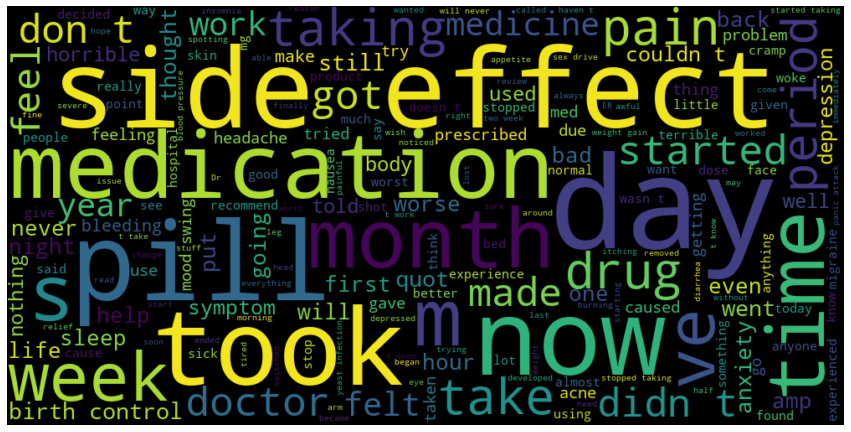

In [18]:
df_rate_one = df_data.loc[df_data.rating == 1, 'review']
k1 = (' '.join(df_rate_one))

wordcloud = WordCloud(width = 1000, height = 500).generate(k1)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');
# did it cuz it looks cool

In [19]:
def review_clean(review): 
    # changing to lower case
    lower = review.str.lower()
    pattern_remove = lower.str.replace("&#039;", "")
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')
    
    return dataframe

In [20]:
from nltk.corpus import stopwords

In [21]:
df_data['sentiment_rate'] = df_data['rating'].apply(lambda x: 1 if x > 5 else 0)

In [22]:
import re

In [23]:
contractions_dict = {
    "ain't": "am not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have", "'cause": "because",
    "could've": "could have", "couldn't": "could not", "couldn't've": "could not have", "didn't": "did not", "doesn't": "does not",
    "doesn’t": "does not", "don't": "do not", "don’t": "do not", "hadn't": "had not", "hadn't've": "had not have", "hasn't": "has not",
    "haven't": "have not", "he'd": "he had", "he'd've": "he would have", "he'll": "he will", "he'll've": "he will have", "he's": "he is",
    "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "i'd": "i would", "i'd've": "i would have",
    "i'll": "i will", "i'll've": "i will have", "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have",
    "it'll": "it will", "it'll've": "it will have", "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not","might've": "might have",
    "mightn't": "might not", "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have",
    "needn't": "need not", "needn't've": "need not have", "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have",
    "shan't": "shall not","sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have",
    "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not",
    "shouldn't've": "should not have", "so've": "so have", "so's": "so is", "that'd": "that would", "that'd've": "that would have",
    "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "they'd": "they would",
    "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have",
    "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have",
    "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
    "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
    "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is",
    "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have",
    "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y’all": "you all", "y'all'd": "you all would",
    "y'all'd've": "you all would have", "y'all're": "you all are", "y'all've": "you all have", "you'd": "you would", "you'd've": "you would have",
    "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have", "ain’t": "am not", "aren’t": "are not",
    "can’t": "cannot", "can’t’ve": "cannot have", "’cause": "because", "could’ve": "could have", "couldn’t": "could not", "couldn’t’ve": "could not have",
    "didn’t": "did not", "doesn’t": "does not", "don’t": "do not", "don’t": "do not", "hadn’t": "had not", "hadn’t’ve": "had not have",
    "hasn’t": "has not", "haven’t": "have not", "he’d": "he had", "he’d’ve": "he would have", "he’ll": "he will", "he’ll’ve": "he will have",
    "he’s": "he is", "how’d": "how did", "how’d’y": "how do you", "how’ll": "how will", "how’s": "how is", "i’d": "i would", "i’d’ve": "i would have",
    "i’ll": "i will", "i’ll’ve": "i will have", "i’m": "i am", "i’ve": "i have", "isn’t": "is not", "it’d": "it would", "it’d’ve": "it would have",
    "it’ll": "it will", "it’ll’ve": "it will have", "it’s": "it is", "let’s": "let us", "ma’am": "madam", "mayn’t": "may not",
    "might’ve": "might have", "mightn’t": "might not", "mightn’t’ve": "might not have", "must’ve": "must have", "mustn’t": "must not",
    "mustn’t’ve": "must not have", "needn’t": "need not", "needn’t’ve": "need not have", "o’clock": "of the clock",
    "oughtn’t": "ought not", "oughtn’t’ve": "ought not have", "shan’t": "shall not", "sha’n’t": "shall not", "shan’t’ve": "shall not have",
    "she’d": "she would", "she’d’ve": "she would have", "she’ll": "she will", "she’ll’ve": "she will have", "she’s": "she is",
    "should’ve": "should have", "shouldn’t": "should not", "shouldn’t’ve": "should not have", "so’ve": "so have", "so’s": "so is",
    "that’d": "that would", "that’d’ve": "that would have", "that’s": "that is", "there’d": "there would", "there’d’ve": "there would have",
    "there’s": "there is", "they’d": "they would", "they’d’ve": "they would have", "they’ll": "they will", "they’ll’ve": "they will have",
    "they’re": "they are", "they’ve": "they have", "to’ve": "to have", "wasn’t": "was not", "we’d": "we would", "we’d’ve": "we would have",
    "we’ll": "we will", "we’ll’ve": "we will have", "we’re": "we are", "we’ve": "we have", "weren’t": "were not", "what’ll": "what will",
    "what’ll’ve": "what will have", "what’re": "what are", "what’s": "what is", "what’ve": "what have", "when’s": "when is",
    "when’ve": "when have", "where’d": "where did", "where’s": "where is", "where’ve": "where have", "who’ll": "who will",
    "who’ll’ve": "who will have", "who’s": "who is", "who’ve": "who have","why’s": "why is", "why’ve": "why have", "will’ve": "will have",
    "won’t": "will not", "won’t’ve": "will not have", "would’ve": "would have", "wouldn’t": "would not", "wouldn’t’ve": "would not have",
    "y’all": "you all", "y’all": "you all", "y’all’d": "you all would", "y’all’d’ve": "you all would have", "y’all’re": "you all are",
    "y’all’ve": "you all have", "you’d": "you would", "you’d’ve": "you would have", "you’ll": "you will", "you’ll’ve": "you will have",
    "you’re": "you are", "you’re": "you are", "you’ve": "you have"
}
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function expand the contractions if there's any
def expand_contractions(s, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, s)


In [24]:
df_data['review_clean'] = review_clean(df_data['review'])
df_data['review_clean'] = df_data['review_clean'].apply(lambda x: expand_contractions(x))
df_data['review_clean'] = df_data['review_clean'].apply(lambda x: ''.join(word for word in x if word not in punctuation))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':


In [17]:
#train.drop(columns =['year','month','day'])

KeyError: ignored

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [68]:
df_data['date'] = pd.to_datetime(df_data['date'], errors='coerce')
#df_data['date'] = pd.to_datetime(df_data.date, format='%d-%m-%Y')
df_data['day'] = df_data['date'].dt.day.astype(np.int64)
df_data['month'] = df_data['date'].dt.month.astype(np.int64)
df_data['year'] = df_data['date'].dt.year.astype(np.int64)

In [48]:
df_data.head(5)

,uniqueID,drugName,condition,review,rating,date,usefulCount,sentiment_rate,review_clean,sentiment,...,sentiment_clean_ss,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,day,month,year
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,1,it has no side effect i take it in combination...,0.000000,...,0.000000,17,16,76,3,1,6,20,5,2012
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,1,my son is halfway through his fourth week of i...,0.168333,...,0.168333,141,97,716,23,2,13,27,4,2010
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,0,i used to take another oral contraceptive whic...,0.067210,...,0.067210,134,89,714,34,6,15,14,12,2009
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10,1,this is my first time using any form of birth ...,0.179545,...,0.179545,91,58,432,15,4,9,3,11,2015
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,1,suboxone has completely turned my life around ...,0.194444,...,0.194444,125,85,670,28,7,15,27,11,2016


In [14]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train.review)


X_test = vectorizer.transform(test.review)

In [15]:
train['binary_rating'] = train['rating'] > 5

y_train_rating = train.binary_rating
clf = MultinomialNB().fit(X_train, y_train_rating)


test['binary_rating'] = test.rating > 5
y_test_rating = test.binary_rating
pred = clf.predict(X_test)

print("Accuracy: %s" % str(clf.score(X_test, y_test_rating)))
print("Confusion Matrix")
print(confusion_matrix(pred, y_test_rating))

Accuracy: 0.7527247703009337
Confusion Matrix
[[ 3233   321]
 [12974 37238]]


In [30]:
def sentiment(review):
    # Sentiment polarity of the reviews
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

In [32]:
from textblob import TextBlob
df_data['sentiment'] = sentiment(df_data['review'])


In [33]:

df_data['review_clean_ss'] = review_clean(df_data['review'])

df_data['review_clean_ss'] = df_data['review_clean_ss'].apply(lambda x: expand_contractions(x))

df_data['review_clean_ss'] = df_data['review_clean_ss'].apply(lambda x: ''.join(word for word in x if word not in punctuation))

df_data['sentiment_clean_ss'] = sentiment(df_data['review_clean_ss'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':


In [49]:
import string
df_data['count_word']=df_data["review_clean_ss"].apply(lambda x: len(str(x).split()))

#Unique word count 
df_data['count_unique_word']=df_data["review_clean_ss"].apply(lambda x: len(set(str(x).split())))

#Letter count
df_data['count_letters']=df_data["review_clean_ss"].apply(lambda x: len(str(x)))

#punctuation count
df_data["count_punctuations"] = df_data["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
df_data["count_words_upper"] = df_data["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
df_data["count_words_title"] = df_data["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))


#Average length of the words
df_data["mean_word_len"] = df_data["review_clean_ss"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [62]:
features = df_data[['condition', 'sentiment', 'day', 'month', 'year',
                   'sentiment_clean_ss', 'count_word', 'count_unique_word', 'count_letters',
                   'count_punctuations', 'count_words_upper', 'count_words_title',
                   'mean_word_len']]

target = df_data['sentiment_rate']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)

In [55]:
from sklearn.preprocessing import LabelEncoder
label_encoder_feat = {}
for feature in ['drugName', 'condition']:
    label_encoder_feat[feature] = LabelEncoder()
    df_data[feature] = label_encoder_feat[feature].fit_transform(df_data[feature])

In [69]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 53765
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   uniqueID            215063 non-null  int64         
 1   drugName            215063 non-null  int64         
 2   condition           215063 non-null  int64         
 3   review              215063 non-null  object        
 4   rating              215063 non-null  int64         
 5   date                215063 non-null  datetime64[ns]
 6   usefulCount         215063 non-null  int64         
 7   sentiment_rate      215063 non-null  int64         
 8   review_clean        215063 non-null  object        
 9   sentiment           215063 non-null  float64       
 10  review_clean_ss     215063 non-null  object        
 11  sentiment_clean_ss  215063 non-null  float64       
 12  count_word          215063 non-null  int64         
 13  count_unique_word   215063 non

In [16]:
# Traiing random forest
start = time.time()
rfc_rating = RandomForestClassifier(n_estimators=100, random_state=42, max_depth = 10000, min_samples_split = 0.001)
rfc_rating.fit(X_train, y_train_rating)
end = time.time()
print("Training time: %s" % str(end-start))

# Evaluates model on test set
pred = rfc_rating.predict(X_test)

print("Accuracy: %s" % str(rfc_rating.score(X_test, y_test_rating)))
print("Confusion Matrix")
print(confusion_matrix(pred, y_test_rating))

Training time: 327.92611050605774
Accuracy: 0.8310084439980657
Confusion Matrix
[[ 7252   131]
 [ 8955 37428]]


In [63]:
# Training xgb

xgb_clf = XGBClassifier(n_estimator = 10000,
                    learning_rate=0.10,
                    num_leaves=30)

model_xgb = xgb_clf.fit(X_train, y_train)

predictions_2 = model_xgb.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions_2), '\n')
print ("The confusion Matrix is \n")
print (confusion_matrix(y_test, predictions_2), '\n')

print (classification_report(y_test, predictions_2))

The Accuracy of the model is :  0.7436569072676266 

The confusion Matrix is 

[[ 6098 13237]
 [ 3302 41882]] 

              precision    recall  f1-score   support

           0       0.65      0.32      0.42     19335
           1       0.76      0.93      0.84     45184

    accuracy                           0.74     64519
   macro avg       0.70      0.62      0.63     64519
weighted avg       0.73      0.74      0.71     64519



In [70]:
clf = LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.10,
        num_leaves=30,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )
model = clf.fit(X_train, y_train)

predictions = model.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions), '\n')
print ("The confusion Matrix is \n")
print (confusion_matrix(y_test, predictions), '\n')

print (classification_report(y_test, predictions))

The Accuracy of the model is :  0.8632030874626079 

The confusion Matrix is 

[[13208  6127]
 [ 2699 42485]] 

              precision    recall  f1-score   support

           0       0.83      0.68      0.75     19335
           1       0.87      0.94      0.91     45184

    accuracy                           0.86     64519
   macro avg       0.85      0.81      0.83     64519
weighted avg       0.86      0.86      0.86     64519

